In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
sp = ' '
n = '\n'
r = 'руль'
left = 'слева'
right = 'справа'
km = 'км'
clw = '<i class="color-icon white" data-color="#FFFFFF" title="'
cl = '<i class="color-icon" data-color="'
iteg = '"></i>'
titl = '" title="'

In [ ]:
#https://www.mashina.kg/search/subaru/all/?currency=2&sort_by=upped_at%20desc&time_created=all
car_model = []
yearofprod = []
eng_vol = []
mileage = []
fuel = []
gear_mech = []
steer_wheel_location = []
color = []
body_t = []
location = []
price_usd = []
mileage2 = []
for i in range(0,27):
    html_text = requests.get(f'https://www.mashina.kg/search/subaru/?currency=2&price_from=&price_to=&page={i}').text
    soup = BeautifulSoup(html_text, 'lxml')
    cars1 = soup.find_all('div', class_ = 'list-item list-label new-line')
    cars = soup.find_all('div', class_ = 'list-item list-label')
    for i in cars1:
        car_model.append(i.find('h2', class_ = 'name').text.replace(sp, '').replace(n, ''))
        yearofprod.append(int(i.find('p', class_ = 'year-miles').text.replace(sp, '').replace(n, '').replace('г.', '').split(',')[0]))
        eng_vol.append(i.find('p', class_ = 'year-miles').text.replace(sp, '').replace(n, '').replace('л.', '').split(',')[1])
        gear_mech.append(i.find('p', class_ = 'year-miles').text.replace(sp, '').replace(n, '').split(',')[2])
        if len(((i.find('p', class_ = 'volume').text.replace(n, '').replace(r, '').replace(sp, '').split(',')))) ==1:
            mileage.append(0)
        else:
            mileage.append(i.find('p', class_ = 'volume').text.replace(n, '').replace(sp, '').replace(right, '').replace(left, '').replace(km, '').split(',')[-1])
        fuel.append(i.find('p', class_ = 'body-type').text.replace(n, '').replace(sp, '').split(',')[1])
        steer_wheel_location.append(i.find('p', class_ = 'volume').text.replace(n, '').replace(r, '').replace(sp, '').split(',')[0])
        color.append(str(i.find('i', class_ = 'color-icon')).replace(clw, '').replace(cl, '').replace('"></i>', '').replace(titl, ' ').split(sp)[-1])
        body_t.append(i.find('p', class_ = 'body-type').text.replace(n, '').replace(sp, '').split(',')[0])
        location.append(i.find('p', class_ = 'city').text.replace(sp, '').split(n)[1])
        price_usd.append(int(i.find('p', class_ = 'price').text.replace(sp, '').replace('$', '').split(n)[1]))
    for i in cars:
        car_model.append(i.find('h2', class_ = 'name').text.replace(sp, '').replace(n, ''))
        yearofprod.append(int(i.find('p', class_ = 'year-miles').text.replace(sp, '').replace(n, '').replace('г.', '').split(',')[0]))
        eng_vol.append(i.find('p', class_ = 'year-miles').text.replace(sp, '').replace(n, '').replace('л.', '').split(',')[1])
        gear_mech.append(i.find('p', class_ = 'year-miles').text.replace(sp, '').replace(n, '').split(',')[2])
        if len(((i.find('p', class_ = 'volume').text.replace(n, '').replace(r, '').replace(sp, '').split(',')))) ==1:
            mileage.append(0)
        else:
            mileage.append(i.find('p', class_ = 'volume').text.replace(n, '').replace(sp, '').replace(right, '').replace(left, '').replace(km, '').split(',')[-1])
        fuel.append(i.find('p', class_ = 'body-type').text.replace(n, '').replace(sp, '').split(',')[1])
        steer_wheel_location.append(i.find('p', class_ = 'volume').text.replace(n, '').replace(r, '').replace(sp, '').split(',')[0])
        color.append(str(i.find('i', class_ = 'color-icon')).replace(clw, '').replace(cl, '').replace('"></i>', '').replace(titl, ' ').split(sp)[-1])
        body_t.append(i.find('p', class_ = 'body-type').text.replace(n, '').replace(sp, '').split(',')[0])
        location.append(i.find('p', class_ = 'city').text.replace(sp, '').split(n)[1])
        price_usd.append(int(i.find('p', class_ = 'price').text.replace(sp, '').replace('$', '').split(n)[1]))
df = pd.DataFrame(list(zip(car_model, yearofprod, eng_vol, mileage, fuel, gear_mech, steer_wheel_location, color, body_t, location, price_usd)),
               columns =["Car model", "YearOfProd", "Engine vol", "Mileage", "Fuel", "Gearbox mech", "SteeringWheel", "Color", "Body type", "Location", "Price $"])
df

,Car model,YearOfProd,Engine vol,Mileage,Fuel,Gearbox mech,SteeringWheel,Color,Body type,Location,Price $
0,SubaruOutback,2015,2.5,105000,бензин,вариатор,слева,серый,универсал,Бишкек,17800
1,SubaruImprezaWRX,2005,2.5,0,бензин,механика,справа,синий,седан,Бишкек,9500
2,SubaruLegacyLancaster,2002,2.5,205220,бензин,автомат,справа,серебристый,универсал,Бишкек,4200
3,SubaruForester,2009,2.5,0,бензин,автомат,слева,бирюзовый,внедорожник5дв.,Кызыл-Суу,9000
4,SubaruLegacy,2003,2,0,бензин,автомат,справа,серебристый,универсал,Бишкек,4953
...,...,...,...,...,...,...,...,...,...,...,...
516,SubaruForester,2010,2.5,122800,бензин,автомат,слева,зеленый,внедорожник5дв.,Бишкек,8500
517,SubaruLegacy,2003,2,300000,бензин,автомат,слева,черный,универсал,Бишкек,5000
518,SubaruLegacy,2011,2,150000,бензин,вариатор,слева,серый,седан,Бишкек,8800
519,SubaruLegacy,2003,2,190000,бензин,автомат,справа,серебристый,седан,Бишкек,5800


# Task 2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car model      521 non-null    object
 1   YearOfProd     521 non-null    int64 
 2   Engine vol     521 non-null    object
 3   Mileage        521 non-null    object
 4   Fuel           521 non-null    object
 5   Gearbox mech   521 non-null    object
 6   SteeringWheel  521 non-null    object
 7   Color          521 non-null    object
 8   Body type      521 non-null    object
 9   Location       521 non-null    object
 10  Price $        521 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 44.9+ KB


In [ ]:
df['Mileage'] = df['Mileage'].astype('int64')
df['Engine vol'] = df['Engine vol'].astype('float64')

In [ ]:
df = df.mask(df == 0).fillna(df.mean())

In [ ]:
df['Mileage'] = df['Mileage'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car model      521 non-null    object 
 1   YearOfProd     521 non-null    int64  
 2   Engine vol     521 non-null    float64
 3   Mileage        521 non-null    int64  
 4   Fuel           521 non-null    object 
 5   Gearbox mech   521 non-null    object 
 6   SteeringWheel  521 non-null    object 
 7   Color          521 non-null    object 
 8   Body type      521 non-null    object 
 9   Location       521 non-null    object 
 10  Price $        521 non-null    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 44.9+ KB


In [ ]:
df['Gearbox mech'].unique()

array(['вариатор', 'механика', 'автомат'], dtype=object)

In [ ]:
df['Fuel'].unique()

array(['бензин'], dtype=object)

In [ ]:
df['Fuel'] = df['Fuel'].map({'бензин': 1, 'дизель': 0})

In [ ]:
df = pd.concat([df, pd.get_dummies(df['Gearbox mech'])],axis=1)

In [ ]:
df['SteeringWheel'] = df['SteeringWheel'].map({'справа': 1, 'слева': 0})

In [ ]:
df.pop('Gearbox mech')

0      вариатор
1      механика
2       автомат
3       автомат
4       автомат
         ...   
516     автомат
517     автомат
518    вариатор
519     автомат
520     автомат
Name: Gearbox mech, Length: 521, dtype: object

In [ ]:
df

,Car model,YearOfProd,Engine vol,Mileage,Fuel,SteeringWheel,Color,Body type,Location,Price $,автомат,вариатор,механика
0,SubaruOutback,2015,2.5,105000,1,0,серый,универсал,Бишкек,17800,0,1,0
1,SubaruImprezaWRX,2005,2.5,150310,1,1,синий,седан,Бишкек,9500,0,0,1
2,SubaruLegacyLancaster,2002,2.5,205220,1,1,серебристый,универсал,Бишкек,4200,1,0,0
3,SubaruForester,2009,2.5,150310,1,0,бирюзовый,внедорожник5дв.,Кызыл-Суу,9000,1,0,0
4,SubaruLegacy,2003,2.0,150310,1,1,серебристый,универсал,Бишкек,4953,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,SubaruForester,2010,2.5,122800,1,0,зеленый,внедорожник5дв.,Бишкек,8500,1,0,0
517,SubaruLegacy,2003,2.0,300000,1,0,черный,универсал,Бишкек,5000,1,0,0
518,SubaruLegacy,2011,2.0,150000,1,0,серый,седан,Бишкек,8800,0,1,0
519,SubaruLegacy,2003,2.0,190000,1,1,серебристый,седан,Бишкек,5800,1,0,0


In [ ]:
y = df['Price $']

In [ ]:
x = df
x.pop('Price $')

0      17800
1       9500
2       4200
3       9000
4       4953
       ...  
516     8500
517     5000
518     8800
519     5800
520     5300
Name: Price $, Length: 521, dtype: int64

In [ ]:
df

,Car model,YearOfProd,Engine vol,Mileage,Fuel,SteeringWheel,Color,Body type,Location,автомат,вариатор,механика
0,SubaruOutback,2015,2.5,105000,1,0,серый,универсал,Бишкек,0,1,0
1,SubaruImprezaWRX,2005,2.5,150310,1,1,синий,седан,Бишкек,0,0,1
2,SubaruLegacyLancaster,2002,2.5,205220,1,1,серебристый,универсал,Бишкек,1,0,0
3,SubaruForester,2009,2.5,150310,1,0,бирюзовый,внедорожник5дв.,Кызыл-Суу,1,0,0
4,SubaruLegacy,2003,2.0,150310,1,1,серебристый,универсал,Бишкек,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
516,SubaruForester,2010,2.5,122800,1,0,зеленый,внедорожник5дв.,Бишкек,1,0,0
517,SubaruLegacy,2003,2.0,300000,1,0,черный,универсал,Бишкек,1,0,0
518,SubaruLegacy,2011,2.0,150000,1,0,серый,седан,Бишкек,0,1,0
519,SubaruLegacy,2003,2.0,190000,1,1,серебристый,седан,Бишкек,1,0,0


In [ ]:
x['Body type'].unique()

array(['универсал', 'седан', 'внедорожник5дв.', 'внедорожник', 'купе',
       'хэтчбек5дв.'], dtype=object)

In [ ]:
x = pd.concat([x, pd.get_dummies(x['Body type'])],axis=1)
x.pop('Body type')

0            универсал
1                седан
2            универсал
3      внедорожник5дв.
4            универсал
            ...       
516    внедорожник5дв.
517          универсал
518              седан
519              седан
520              седан
Name: Body type, Length: 521, dtype: object

In [ ]:
x.pop('Car model')

0              SubaruOutback
1           SubaruImprezaWRX
2      SubaruLegacyLancaster
3             SubaruForester
4               SubaruLegacy
               ...          
516           SubaruForester
517             SubaruLegacy
518             SubaruLegacy
519             SubaruLegacy
520            SubaruImpreza
Name: Car model, Length: 521, dtype: object

In [ ]:
x = pd.concat([x, pd.get_dummies(x['Color'])],axis=1)
x.pop('Color')
x

,YearOfProd,Engine vol,Mileage,Fuel,SteeringWheel,Location,автомат,вариатор,механика,внедорожник,...,жёлтый,зеленый,золотистый,коричневый,красный,серебристый,серый,синий,хамелеон,черный
0,2015,2.5,105000,1,0,Бишкек,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2005,2.5,150310,1,1,Бишкек,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2002,2.5,205220,1,1,Бишкек,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2009,2.5,150310,1,0,Кызыл-Суу,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2003,2.0,150310,1,1,Бишкек,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2010,2.5,122800,1,0,Бишкек,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
517,2003,2.0,300000,1,0,Бишкек,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
518,2011,2.0,150000,1,0,Бишкек,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
519,2003,2.0,190000,1,1,Бишкек,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
x = pd.concat([x, pd.get_dummies(x['Location'])],axis=1)
x.pop('Location')
x

,YearOfProd,Engine vol,Mileage,Fuel,SteeringWheel,автомат,вариатор,механика,внедорожник,внедорожник5дв.,...,Россия,США,Сокулук,Талас,Таш-Кумыр,Токмок,Токтогул,Узген,Чаек,Чолпон-Ата
0,2015,2.5,105000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2005,2.5,150310,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2002,2.5,205220,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009,2.5,150310,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2003,2.0,150310,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2010,2.5,122800,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
517,2003,2.0,300000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
518,2011,2.0,150000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
519,2003,2.0,190000,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x, y)
RFR.score(x, y)

0.9839318497882723

(array([[521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 12.,  74., 274., 113.,  42.,   4.,   1.,   0.,   0.,   1.],
        [521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [521.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [521.,   0.,

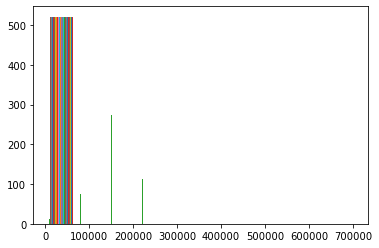

In [ ]:
import matplotlib.pyplot as plt
plt.hist(x)